# IMPORTING LIABRYIES

In [20]:
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display
from sklearn import metrics
from sklearn.model_selection import train_test_split
import numpy as np 
import pandas as pd
import seaborn as sns
import pandas_profiling

from fastai.imports import *
from fastai.tabular import *
from pandas_summary import DataFrameSummary
from sklearn.model_selection import train_test_split
%load_ext autoreload
%autoreload 2
%matplotlib inline 
pd.options.mode.chained_assignment = None

# READING DATA

In [21]:
dia_data = pd.read_excel("MIPDataset1.xlsx")
dia_data.head()

,Sex,Age,BP,Smooking,Exercise,Alcohol,FBS,Height,Weight,BMI,SBP,DBP,Food,Family_Hstory,Genotype,Outcome
0,1,51,0,0.0,0.0,0.0,NaN,1.62,55.0,20.96,153.0,101.0,0.0,1,3.0,1
1,0,40,1,0.0,1.0,1.0,275.0,1.60,85.0,33.59,148.0,90.0,0.0,0,2.0,1
2,0,48,1,0.0,1.0,1.0,89.0,1.60,65.0,25.39,152.0,102.0,1.0,0,3.0,1
3,0,39,0,0.0,0.0,1.0,137.0,1.59,67.0,26.50,101.0,69.0,0.0,0,1.0,0
4,0,40,0,0.0,1.0,1.0,99.0,1.61,71.0,27.39,115.5,80.5,1.0,1,3.0,0


#   DATA CLAENING

In [22]:
dia_data.shape

(85, 16)

In [23]:
dia_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Sex            85 non-null     int64  
 1   Age            85 non-null     int64  
 2   BP             85 non-null     int64  
 3   Smooking       81 non-null     float64
 4   Exercise       81 non-null     float64
 5   Alcohol        81 non-null     float64
 6   FBS            82 non-null     float64
 7   Height         76 non-null     float64
 8   Weight         76 non-null     float64
 9   BMI            69 non-null     float64
 10  SBP            85 non-null     float64
 11  DBP            85 non-null     float64
 12  Food           79 non-null     float64
 13  Family_Hstory  85 non-null     int64  
 14  Genotype       81 non-null     float64
 15  Outcome        85 non-null     int64  
dtypes: float64(11), int64(5)
memory usage: 10.8 KB


In [24]:
dia_data.isnull().sum()

Sex               0
Age               0
BP                0
Smooking          4
Exercise          4
Alcohol           4
FBS               3
Height            9
Weight            9
BMI              16
SBP               0
DBP               0
Food              6
Family_Hstory     0
Genotype          4
Outcome           0
dtype: int64

In [25]:
dia_data.describe()

,Sex,Age,BP,Smooking,Exercise,Alcohol,FBS,Height,Weight,BMI,SBP,DBP,Food,Family_Hstory,Genotype,Outcome
count,85.000000,85.000000,85.000000,81.000000,81.000000,81.000000,82.000000,76.000000,76.000000,69.000000,85.000000,85.000000,79.000000,85.000000,81.000000,85.000000
mean,0.494118,48.635294,0.411765,0.160494,0.296296,0.802469,124.024390,1.657105,77.302632,28.431739,134.027059,87.429412,0.379747,0.400000,2.246914,0.494118
std,0.502933,13.313837,0.495074,0.369350,0.459468,0.400617,35.948514,0.101690,13.022053,5.431523,22.464901,13.258230,0.488425,0.492805,0.680641,0.502933
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,1.250000,55.000000,19.140000,87.000000,51.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,40.000000,0.000000,0.000000,0.000000,1.000000,106.000000,1.600000,68.000000,24.460000,115.000000,80.000000,0.000000,0.000000,2.000000,0.000000
50%,0.000000,47.000000,0.000000,0.000000,0.000000,1.000000,119.000000,1.650000,75.000000,27.240000,132.500000,86.500000,0.000000,0.000000,2.000000,0.000000
75%,1.000000,58.000000,1.000000,0.000000,1.000000,1.000000,131.750000,1.702500,82.250000,31.640000,149.500000,96.500000,1.000000,1.000000,3.000000,1.000000
max,1.000000,81.000000,1.000000,1.000000,1.000000,1.000000,298.000000,1.880000,130.000000,47.360000,189.000000,115.500000,1.000000,1.000000,3.000000,1.000000


In [26]:
dia_data.columns = ['Sex', 'Age', 'BP', 'Smooking', 'Exercise', 'Alcohol', 'FBS', 'Hight',
       'Weight', 'BMI', 'SBP', 'DBP', 'Food', 'Family History', 'Genotype', 'Outcome']


In [27]:
dia_data.duplicated().sum()

0

In [28]:
dia_data.drop_duplicates(inplace = True)

In [29]:
print("total no of rows :: {} ".format(len(dia_data)))
print("total no of rows missing Sex :: {} ".format(len(dia_data.loc[dia_data['Sex'] == 0])))
print("total no of rows missing Age :: {} ".format(len(dia_data.loc[dia_data['Age'] == 0])))
print("total no of rows missing BP :: {} ".format(len(dia_data.loc[dia_data['BP'] == 0])))
print("total no of rows missing Smooking :: {} ".format(len(dia_data.loc[dia_data['Smooking'] == 0])))
print("total no of rows missing Exercise :: {} ".format(len(dia_data.loc[dia_data['Exercise'] == 0])))
print("total no of rows missing Alcohol :: {} ".format(len(dia_data.loc[dia_data['Alcohol'] == 0])))
print("total no of rows missing FBS :: {} ".format(len(dia_data.loc[dia_data['FBS'] == 0])))
print("total no of rows missing BMI :: {} ".format(len(dia_data.loc[dia_data['BMI'] == 0])))

print("total no of rows missing SBP :: {} ".format(len(dia_data.loc[dia_data['SBP'] == 0])))
print("total no of rows missing DBP :: {} ".format(len(dia_data.loc[dia_data['DBP'] == 0])))
print("total no of rows missing Genotype :: {} ".format(len(dia_data.loc[dia_data['Genotype'] == 0])))
print("total no of rows missing Family History :: {} ".format(len(dia_data.loc[dia_data['Family History'] == 0])))
print("total no of rows missing Food :: {} ".format(len(dia_data.loc[dia_data['Food'] == 0])))


total no of rows :: 85 
total no of rows missing Sex :: 43 
total no of rows missing Age :: 1 
total no of rows missing BP :: 50 
total no of rows missing Smooking :: 68 
total no of rows missing Exercise :: 57 
total no of rows missing Alcohol :: 16 
total no of rows missing FBS :: 0 
total no of rows missing BMI :: 0 
total no of rows missing SBP :: 0 
total no of rows missing DBP :: 0 
total no of rows missing Genotype :: 0 
total no of rows missing Family History :: 51 
total no of rows missing Food :: 49 


In [30]:
dia_data.iloc[:,:-1].columns

Index(['Sex', 'Age', 'BP', 'Smooking', 'Exercise', 'Alcohol', 'FBS', 'Hight',
       'Weight', 'BMI', 'SBP', 'DBP', 'Food', 'Family History', 'Genotype'],
      dtype='object')

# DATA VIZUALIZATION

In [31]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 16,10

sns.set(font_scale=1)

plt.style.use('seaborn-darkgrid')

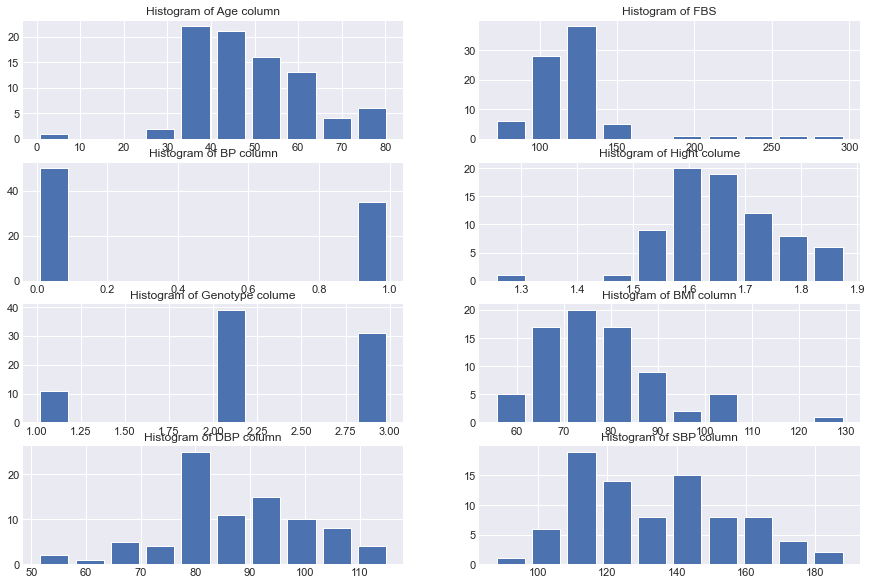

In [32]:
fig , s= plt.subplots(4,2, figsize = (15,10))
s[0][0].set_title("Histogram of Age column")
s[1][0].set_title("Histogram of BP column")
s[2][0].set_title("Histogram of Genotype colume")
s[3][0].set_title("Histogram of DBP column")
s[0][1].set_title("Histogram of FBS")
s[1][1].set_title("Histogram of Hight colume")
s[2][1].set_title("Histogram of BMI column")
s[3][1].set_title("Histogram of SBP column")


s[0][0].hist(dia_data['Age'], rwidth = 0.8)
s[1][0].hist(dia_data['BP'], rwidth = 0.8)
s[2][0].hist(dia_data['Genotype'], rwidth = 0.8)
s[3][0].hist(dia_data['DBP'], rwidth = 0.8)
s[0][1].hist(dia_data['FBS'] ,rwidth = 0.8)
s[1][1].hist(dia_data['Hight'],rwidth = 0.8)
s[2][1].hist(dia_data['Weight'], rwidth = 0.8)
s[3][1].hist(dia_data['SBP'], rwidth = 0.8)

plt.show()

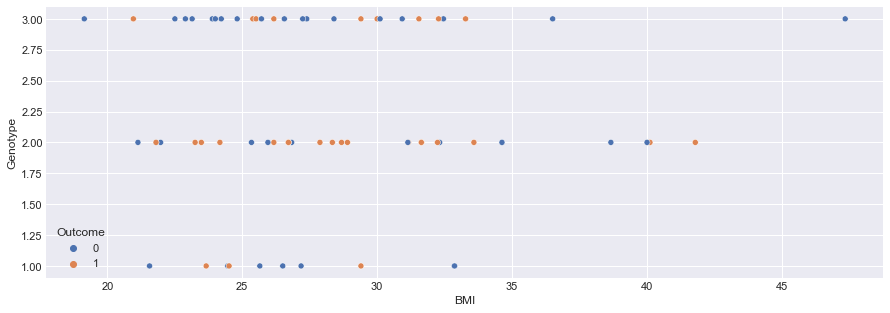

In [33]:
plt.figure(figsize=(15,5))
sns.scatterplot(x= 'BMI',y= 'Genotype', hue = 'Outcome', data = dia_data)
plt.show()

In [34]:
def missing_data_ratio(df):
    all_data_na = (df.isnull().sum() / len(df)) * 100
    all_data_na = all_data_na.drop(all_data_na[all_data_na == 0].index).sort_values(ascending=False)[:30]
    missing_data = pd.DataFrame({'Missing Ratio' :all_data_na})
    return missing_data

In [35]:
import warnings
with warnings.catch_warnings():
    warnings.filterwarnings("ignore", category=DeprecationWarning)
    import imp

In [36]:
profile = pandas_profiling.ProfileReport(dia_data)

In [37]:
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [38]:
corr_data = dia_data.corr() # correlated metrics
top_corr_features = corr_data.index

In [39]:
corr_data

,Sex,Age,BP,Smooking,Exercise,Alcohol,FBS,Hight,Weight,BMI,SBP,DBP,Food,Family History,Genotype,Outcome
Sex,1.000000,-0.050994,-0.396562,0.286705,-0.348715,0.204568,-0.015701,0.663171,0.004683,-0.530842,-0.166624,-0.266081,-0.154160,-0.086459,-0.041012,-0.129568
Age,-0.050994,1.000000,0.095300,0.022567,0.018092,-0.104908,-0.040912,0.018407,-0.079625,-0.078596,0.362800,0.116258,0.056014,0.067860,-0.115822,0.320587
BP,-0.396562,0.095300,1.000000,-0.031131,0.160294,-0.080673,0.095492,-0.261712,0.002562,0.180069,0.400172,0.384451,-0.081001,0.341565,0.105932,0.416250
Smooking,0.286705,0.022567,-0.031131,1.000000,-0.210060,0.216930,-0.123134,0.345085,0.021787,-0.232952,-0.133039,-0.172679,0.047367,-0.020282,0.140964,-0.006656
Exercise,-0.348715,0.018092,0.160294,-0.210060,1.000000,-0.017606,0.001181,-0.326001,-0.030378,0.237055,0.187342,0.191586,0.155510,-0.042798,0.096056,0.256840
Alcohol,0.204568,-0.104908,-0.080673,0.216930,-0.017606,1.000000,-0.035031,0.342499,0.118934,-0.130543,-0.097637,-0.137208,0.216354,-0.093495,-0.062014,-0.092820
FBS,-0.015701,-0.040912,0.095492,-0.123134,0.001181,-0.035031,1.000000,-0.144337,0.001010,0.091015,-0.091023,-0.002771,-0.345100,0.014954,-0.214616,-0.044392
Hight,0.663171,0.018407,-0.261712,0.345085,-0.326001,0.342499,-0.144337,1.000000,0.276054,-0.503613,-0.005699,-0.148166,0.081185,-0.124964,0.031043,0.022475
Weight,0.004683,-0.079625,0.002562,0.021787,-0.030378,0.118934,0.001010,0.276054,1.000000,0.694821,0.090403,0.124132,0.225831,-0.162853,0.013083,0.073904
BMI,-0.530842,-0.078596,0.180069,-0.232952,0.237055,-0.130543,0.091015,-0.503613,0.694821,1.000000,0.049571,0.194791,0.159136,-0.016852,0.005703,0.040328


In [40]:
top_corr_features

Index(['Sex', 'Age', 'BP', 'Smooking', 'Exercise', 'Alcohol', 'FBS', 'Hight',
       'Weight', 'BMI', 'SBP', 'DBP', 'Food', 'Family History', 'Genotype',
       'Outcome'],
      dtype='object')

<AxesSubplot:>

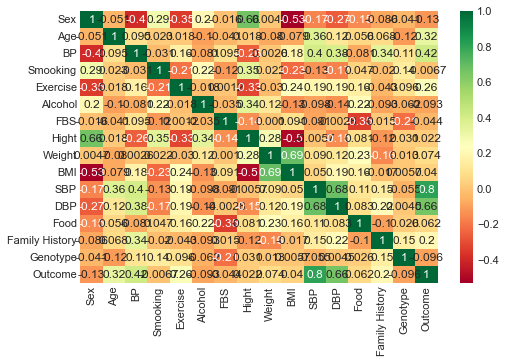

In [41]:
plt.figure(figsize = (8,5))
# annot is used to show each values
# cmap is used for color map on the graph
sns.heatmap(corr_data, annot = True, cmap = 'RdYlGn')

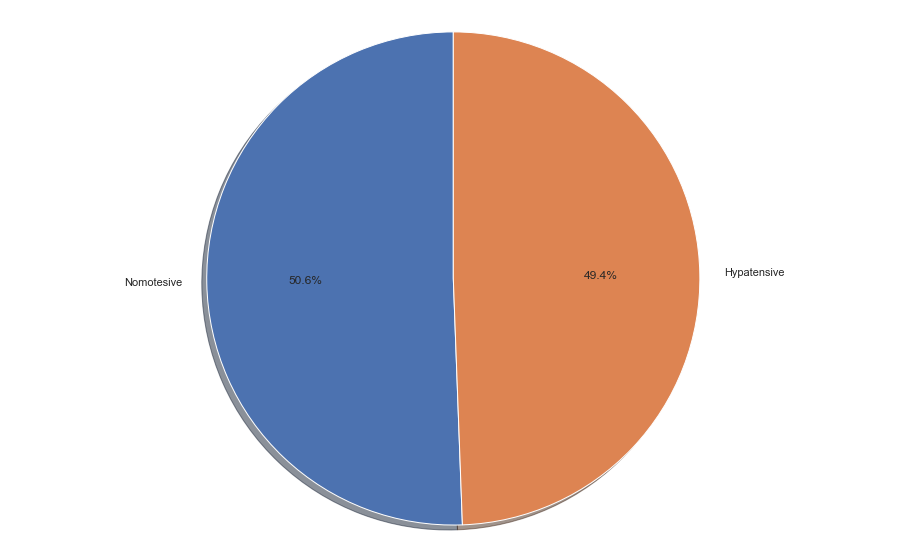

In [42]:
labels = ['Nomotesive', 'Hypatensive']
sizes = [*dia_data.Outcome.value_counts()]

plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax = plt.axis('equal')

In [43]:
feature_cols = dia_data.drop('Outcome', axis=1).columns.to_list()

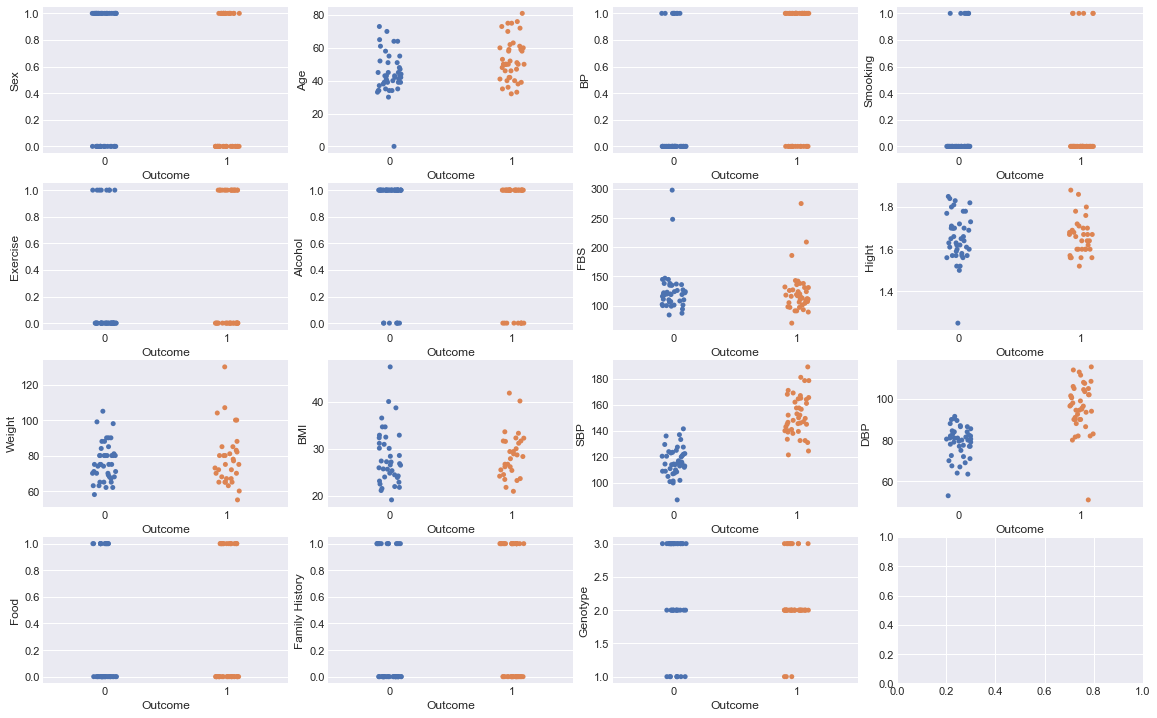

In [44]:
fig, axes = plt.subplots(nrows=4, ncols=4)
plt.tight_layout()

for col, ax in zip(feature_cols, axes.flatten()):
    sns.stripplot(data=dia_data, x='Outcome', y=col, ax=ax)

# CLASSIFICATION

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, PowerTransformer, LabelEncoder
from sklearn.impute import KNNImputer
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import f1_score, accuracy_score, confusion_matrix, classification_report
from sklearn.neural_network import MLPClassifier
from sklearn.naive_bayes import GaussianNB

In [46]:
df = dia_data

In [47]:
X = df.drop('Outcome', axis=1)
y = df.Outcome

In [48]:
le = LabelEncoder()

In [49]:
y = le.fit_transform(y)

In [50]:
from scipy.stats import skew

In [51]:
skewnesses = []

In [52]:
for col in feature_cols:
    skewnesses.append(skew(df[col].values, nan_policy='omit'))

<AxesSubplot:title={'center':'Feature Skewness'}>

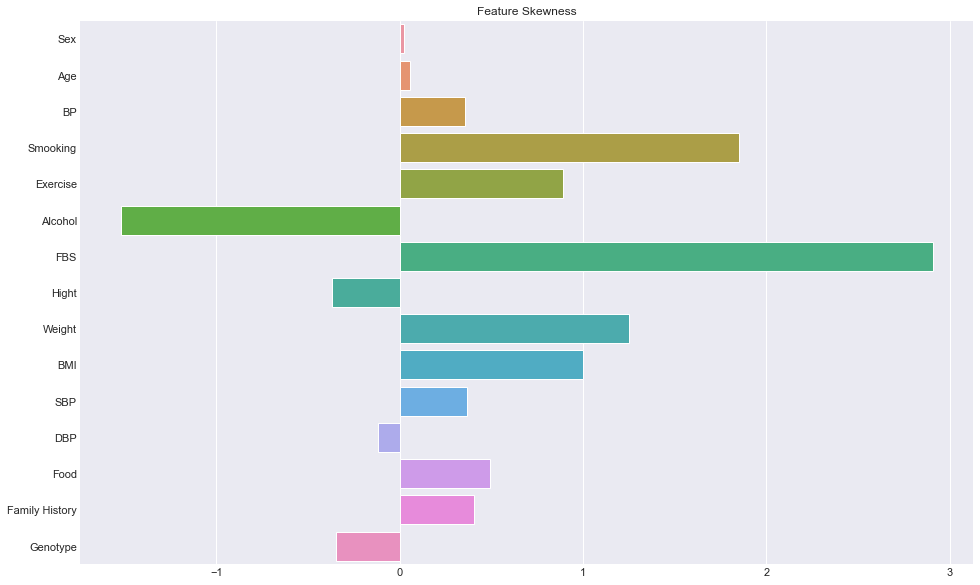

In [53]:
plt.title('Feature Skewness')
sns.barplot(y=feature_cols, x=np.array(skewnesses))

# Almost every feature is skewed, I did play around with power transforms but they did not help really
# They only helped with LogisticRegression but overall the peformance of it was poor regardless

In [54]:
def make_clf_pipeline(alg):
    return Pipeline([
        ('scaler', RobustScaler()),
        ('imputer', KNNImputer(n_neighbors=5, missing_values=np.nan)),
        ('clf', alg)
    ])

In [55]:
classifiers = [
    ('Logistic Regression', LogisticRegression(n_jobs=-1)),
    ('Support Vector Classifier', SVC()),
    ('KNN Classifier', KNeighborsClassifier(n_neighbors=5, n_jobs=-1)),
    ('Decision Tree Classifier', DecisionTreeClassifier()),
    ('Extra Tree Classifier', ExtraTreeClassifier()),
    ('GBM Classifier', GradientBoostingClassifier()),
    ('AdaBoost Classifier', AdaBoostClassifier()),
    ('RF Classifier', RandomForestClassifier(n_jobs=-1, random_state=42)),
    ('GaussianNB', GaussianNB())
]

In [56]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split, cross_val_predict

In [57]:
cv = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)

In [58]:
for classifier in classifiers:
    clf = make_clf_pipeline(classifier[1])
    scores = cross_val_score(X=X, y=y, estimator=clf, cv=cv, error_score='raise', scoring='f1', n_jobs=-1)
    print("Mean F1 score for {} is: ".format(classifier[0]), scores.mean())
    
# As expected Logistic Regression performs poorly whilst the tree based methods are outstanding

Mean F1 score for Logistic Regression is:  0.8809523809523808
Mean F1 score for Support Vector Classifier is:  0.8575396825396826
Mean F1 score for KNN Classifier is:  0.8458730158730159
Mean F1 score for Decision Tree Classifier is:  0.8580447330447332
Mean F1 score for Extra Tree Classifier is:  0.7294444444444445
Mean F1 score for GBM Classifier is:  0.8715367965367966
Mean F1 score for AdaBoost Classifier is:  0.8934920634920636
Mean F1 score for RF Classifier is:  0.9380952380952381
Mean F1 score for GaussianNB is:  0.8518253968253969


In [59]:
for classifier in classifiers:
    clf = make_clf_pipeline(classifier[1])
    scores = cross_val_score(X=X, y=y, estimator=clf, cv=cv, error_score='raise', scoring='accuracy', n_jobs=-1)
    print("Mean Accuracy score for {} is: ".format(classifier[0]), scores.mean())

Mean Accuracy score for Logistic Regression is:  0.8944444444444445
Mean Accuracy score for Support Vector Classifier is:  0.8833333333333334
Mean Accuracy score for KNN Classifier is:  0.8597222222222222
Mean Accuracy score for Decision Tree Classifier is:  0.8708333333333332
Mean Accuracy score for Extra Tree Classifier is:  0.7541666666666667
Mean Accuracy score for GBM Classifier is:  0.8708333333333332
Mean Accuracy score for AdaBoost Classifier is:  0.8944444444444445
Mean Accuracy score for RF Classifier is:  0.9402777777777779
Mean Accuracy score for GaussianNB is:  0.875


In [60]:
y_pred = cross_val_predict(make_clf_pipeline(RandomForestClassifier(random_state=42, n_jobs=-1)), 
                           cv=cv, X=X, y=y, n_jobs=-1)

              precision    recall  f1-score   support

 Nomotensive       0.93      0.95      0.94        43
 Hypatensive       0.95      0.93      0.94        42

    accuracy                           0.94        85
   macro avg       0.94      0.94      0.94        85
weighted avg       0.94      0.94      0.94        85



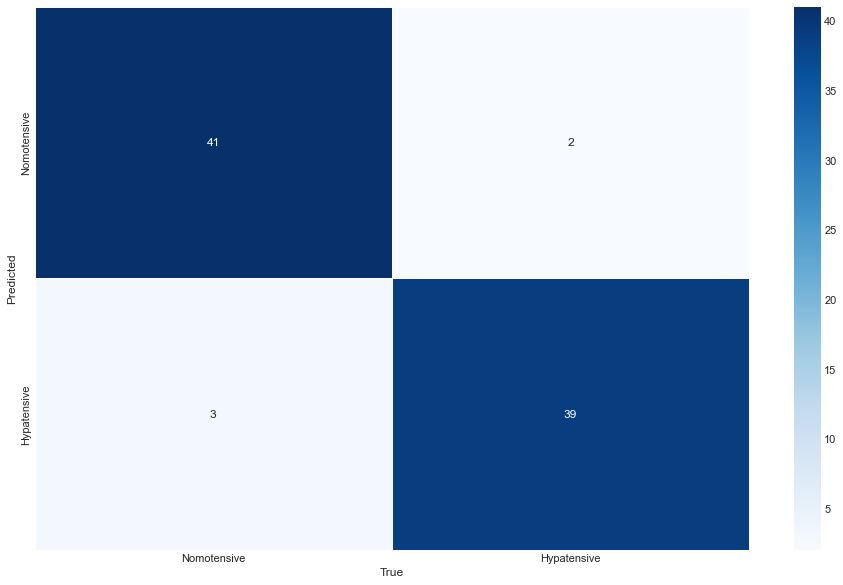

In [61]:
cf_matrix = confusion_matrix(y, y_pred)
df_cf_matrix = pd.DataFrame(cf_matrix, index=['Nomotensive', 'Hypatensive'], columns=['Nomotensive', 'Hypatensive'])

sns.heatmap(df_cf_matrix, linewidths=1, annot=True, fmt='g', cmap='Blues')
plt.xlabel('True')
a = plt.ylabel('Predicted')

print(classification_report(y, y_pred, zero_division=True, target_names=['Nomotensive', 'Hypatensive']))


# XGBOOST FOT PREDICTION

In [62]:
import xgboost as xgb

In [63]:
xgb_classifier = xgb.XGBClassifier()

In [64]:
clf = xgb.XGBClassifier(
    n_estimators=500,
    max_depth=11,
    learning_rate=0.05,
    subsample=0.9,
    colsample_bytree=0.7,
    missing=-999,
    random_state=2020,
    tree_method='gpu_hist'  # THE MAGICAL PARAMETER
)

In [65]:
clf= xgb.XGBClassifier(n_estimators=1000,learning_rate=0.05,use_label_encoder=False )

C:\Users\bellh\anaconda3\lib\site-packages\xgboost\sklearn.py:1421: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [66]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [67]:
clf.fit(X_train, y_train, early_stopping_rounds=5, eval_set=[(X_test, y_test)], verbose=False)

C:\Users\bellh\anaconda3\lib\site-packages\xgboost\sklearn.py:861: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.05, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=6, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [68]:
clf.best_iteration

30

In [69]:
clf= xgb.XGBClassifier(n_estimators = clf.best_iteration, random_state = 73,use_label_encoder=False )

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

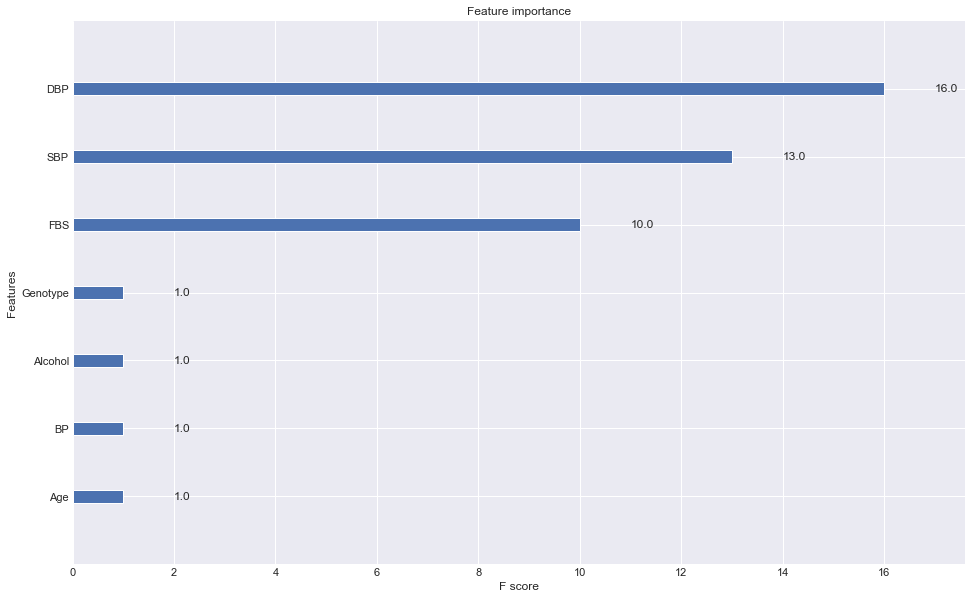

In [70]:
xgb.plot_importance(clf.fit(X_train,y_train))

In [71]:
clf.score(X_test,y_test).round(4)

0.8182

# MULTIY LAYER PERSEPTION 

In [72]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf

In [77]:
x_train_full, x_test, y_train_full, y_test = train_test_split(X, y)
x_train, x_validation, y_train, y_validation = train_test_split(x_train_full, y_train_full)

In [78]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_validation = scaler.fit_transform(x_validation)
x_test = scaler.fit_transform(x_test)

In [79]:
model = tf.keras.Sequential([tf.keras.layers.Dense(30, activation = 'relu', input_shape = x_train.shape[1:]),
                            tf.keras.layers.Dense(1)])

In [80]:
model.compile(loss = tf.losses.mean_squared_error,
             optimizer = 'sgd')

In [81]:
hostory = model.fit(x_train, y_train, epochs=20,
                   validation_data=(x_validation, y_validation))

Epoch 1/20
2/2 [==============================] - 1s 209ms/step - loss: nan - val_loss: nan
Epoch 2/20
2/2 [==============================] - 0s 43ms/step - loss: nan - val_loss: nan
Epoch 3/20
2/2 [==============================] - 0s 51ms/step - loss: nan - val_loss: nan
Epoch 4/20
2/2 [==============================] - 0s 40ms/step - loss: nan - val_loss: nan
Epoch 5/20
2/2 [==============================] - 0s 45ms/step - loss: nan - val_loss: nan
Epoch 6/20
2/2 [==============================] - 0s 47ms/step - loss: nan - val_loss: nan
Epoch 7/20
2/2 [==============================] - 0s 41ms/step - loss: nan - val_loss: nan
Epoch 8/20
2/2 [==============================] - 0s 44ms/step - loss: nan - val_loss: nan
Epoch 9/20
2/2 [==============================] - 0s 43ms/step - loss: nan - val_loss: nan
Epoch 10/20
2/2 [==============================] - 0s 39ms/step - loss: nan - val_loss: nan
Epoch 11/20
2/2 [==============================] - 0s 45ms/step - loss: nan - val_loss: 

In [82]:
mean_squared_error_test = model.evaluate(x_test, y_test)
x_new = x_test[:3] # New instance
y_pred = model.predict(x_new)
y_pred

1/1 [==============================] - 0s 67ms/step


array([[nan],
       [nan],
       [nan]], dtype=float32)

In [83]:
input_a = tf.keras.layers.Input(shape = [5], name = 'wide_input')
input_b = tf.keras.layers.Input(shape = [6], name = 'deep_input')
hidden1 = tf.keras.layers.Dense(30, activation = 'relu')(input_b)
hidden2 = tf.keras.layers.Dense(30, activation = 'relu')(hidden1)
concat = tf.keras.layers.concatenate([input_a, hidden2])
output = tf.keras.layers.Dense(1, name = 'output')(concat)

In [84]:
model = tf.keras.Model(inputs = [input_a, input_b], outputs = [output])

In [85]:
model.compile(loss = tf.losses.mean_squared_error,
             optimizer = tf.keras.optimizers.SGD(lr = 1e-3))

C:\Users\bellh\anaconda3\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [86]:
x_train_a, x_train_b = x_train[:, :5], x_train[:, 2:]
x_validation_a, x_validation_b = x_validation[:, :5], x_validation[:, 2:]
x_test_a, x_test_b = x_test[:, :5], x_test[:, 2:]
x_new_a, x_new_b = x_test_a[:3], x_test_b[:3]

In [88]:
history = model.fit((x_train_a, x_train_b), y_train, epochs=20, validation_data=((x_validation_a, x_validation_b), y_validation))
mean_squared_error_test = model.evaluate((x_test_a, x_test_b), y_test)
y_pred = model.predict((x_new_a, x_new_b))

Epoch 1/20


ValueError: in user code:

    File "C:\Users\bellh\anaconda3\lib\site-packages\keras\engine\training.py", line 1160, in train_function  *
        return step_function(self, iterator)
    File "C:\Users\bellh\anaconda3\lib\site-packages\keras\engine\training.py", line 1146, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "C:\Users\bellh\anaconda3\lib\site-packages\keras\engine\training.py", line 1135, in run_step  **
        outputs = model.train_step(data)
    File "C:\Users\bellh\anaconda3\lib\site-packages\keras\engine\training.py", line 993, in train_step
        y_pred = self(x, training=True)
    File "C:\Users\bellh\anaconda3\lib\site-packages\keras\utils\traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "C:\Users\bellh\anaconda3\lib\site-packages\keras\engine\input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 1 of layer "model_1" is incompatible with the layer: expected shape=(None, 6), found shape=(None, 13)
